# Linear Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Simple Regression

In [2]:
student_dict = {'Hours Studied': [4, 9, 10, 14, 4, 7, 12, 22, 1, 17],
            'Test Score': [31, 58, 65, 73, 37, 44, 60, 91, 21, 84]}

student_df = pd.DataFrame(student_dict)

student_df

,Hours Studied,Test Score
0,4,31
1,9,58
2,10,65
3,14,73
4,4,37
5,7,44
6,12,60
7,22,91
8,1,21
9,17,84


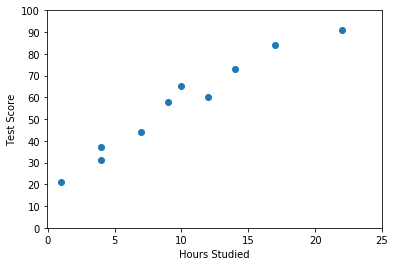

In [3]:
plt.scatter(x=student_df['Hours Studied'], y=student_df['Test Score'])
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.savefig("student_hours_score.png")
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(0, 110, 10))
plt.show()

In [4]:
def getPairStats(x, y):
    
    #calculate means
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    #get number of entries
    n = len(x)
    
    #calculate sums
    x_sum = np.sum(x)
    x_sum_square = np.sum([xi**2 for xi in x])
    y_sum = np.sum(y)
    y_sum_square = np.sum([yi**2 for yi in y])
    xy_sum = np.sum([xi*yi for xi, yi in zip(x, y)])
    
    #calculcate remainder of equations
    s_xx  = x_sum_square - (1/n)*(x_sum**2)
    s_yy = y_sum_square - (1/n)*(y_sum**2)
    s_xy = xy_sum - (1/n)*x_sum*y_sum
    
    return s_xx, s_yy, s_xy

In [5]:
def pair_regression(x, y):
    """
    perform simple regression between predictor variable x and target variable y
    """
    
    #calculate means
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    #get number of entries
    n = len(x)
    
    #get stats
    s_xx, s_yy, s_xy = getPairStats(x, y)
    
    #calculcate coefficients
    beta_hat = s_xy / s_xx
    alpa_hat = y_bar - beta_hat * x_bar
    
    return alpa_hat, beta_hat
    

In [6]:
alpha_hat, beta_hat = pair_regression(x=student_df['Hours Studied'], y=student_df['Test Score'])
print("The vertical axis intercept alpha hat is equal to: {}".format(alpha_hat))
print("The slope beta hat is equal to: {}".format(beta_hat))

The vertical axis intercept alpha hat is equal to: 21.69255319148936
The slope beta hat is equal to: 3.470744680851064


## Plot OLS

In [7]:
y_pred = [alpha_hat + beta_hat*xi for xi in student_df['Hours Studied']]
y_pred

[35.57553191489362,
 52.929255319148936,
 56.4,
 70.28297872340426,
 35.57553191489362,
 45.98776595744681,
 63.34148936170212,
 98.04893617021276,
 25.163297872340422,
 80.69521276595745]

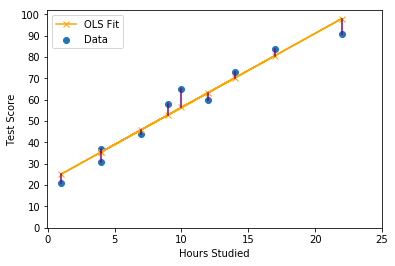

In [8]:
plt.scatter(x=student_df['Hours Studied'], y=student_df['Test Score'], label = 'Data')
plt.plot(student_df['Hours Studied'], y_pred, label = 'OLS Fit', color='orange', marker='x')

#plot OLS vertical deviations
for xi, yi, yp in zip(student_df['Hours Studied'], student_df['Test Score'], y_pred):
    plt.plot([xi, xi], [yi, yp], color='purple')


plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.savefig("student_hours_ols.png")
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

# Hypothesis Testing

- H0: β=3
- H1: β>3
- Set the significance level α=0.01

In [9]:
print (stats.t.ppf(1-0.01, 8))

2.896459442760522


In [10]:
def simple_regression_test(x, y, beta_ho, sig=0.01):
    n = len(x)
    #calculate stats
    s_xx, s_yy, s_xy = getPairStats(x, y)
    
    #get regression coefficients
    alpha_hat, beta_hat = pair_regression(x, y)
    
    #maximim likelihood estimator
    sigma_hat = np.sqrt((1/n)*(s_yy-beta_hat*s_xy))
    
    #calcucalte t statistic
    t_test_value = ((beta_hat - beta_ho)/(sigma_hat)) * np.sqrt((n-2)*s_xx/10)
    
    #calculcate t statistic
    t_limit = stats.t.ppf(1-sig, n-2)
    
    print("We will compare the t statistic of {:.4f} against the calculated value of {:.4f}".format(t_limit, t_test_value))
    
    if t_test_value < t_limit:
        print("Fail to reject H0")
        return False
    else:
        print("Reject H0")
        return True
    
simple_regression_test(x=student_df['Hours Studied'], y=student_df['Test Score'], beta_ho=3, sig=0.01)

We will compare the t statistic of 2.8965 against the calculated value of 1.7286
Fail to reject H0


False

# Confidence Interval

In [11]:
def simple_regression_conf(x, y, alpha=0.05):
    
    n = len(x)
    #calculate stats
    s_xx, s_yy, s_xy = getPairStats(x, y)
    
    #get regression coefficients
    alpha_hat, beta_hat = pair_regression(x, y)
    
    #maximim likelihood estimator
    sigma_hat = np.sqrt((1/n)*(s_yy-beta_hat*s_xy))
    
    #calculcate t statistic
    t_limit = stats.t.ppf(1-alpha/2, n-2)
    #interval term
    interval_val = t_limit*sigma_hat*np.sqrt(n/((n-2)*s_xx))
    
    #calculcate intervals
    beta_upper = beta_hat + interval_val
    beta_lower = beta_hat - interval_val
    
    return beta_lower, beta_upper

beta_lower, beta_upper = simple_regression_conf(x=student_df['Hours Studied'], y=student_df['Test Score'], alpha=0.05)
print("beta_lower: {:.4f}".format(beta_lower))
print("beta_upper: {:.4f}".format(beta_upper))

beta_lower: 2.8428
beta_upper: 4.0987


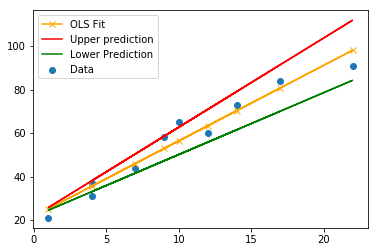

In [12]:
y_upper = [alpha_hat + beta_upper*xi for xi in student_df['Hours Studied']]
y_lower = [alpha_hat + beta_lower*xi for xi in student_df['Hours Studied']]

plt.scatter(x=student_df['Hours Studied'], y=student_df['Test Score'], label = 'Data')
plt.plot(student_df['Hours Studied'], y_pred, label = 'OLS Fit', color='orange', marker='x')
plt.plot(student_df['Hours Studied'], y_upper, label = 'Upper prediction', color='red')
plt.plot(student_df['Hours Studied'], y_lower, label = 'Lower Prediction', color='green')
plt.legend()

plt.savefig("95p_conf_fit.png")

plt.show()

# Normal Correlation Analysis

In [13]:
def linear_reg_corr(x, y):
    #calculate stats
    s_xx, s_yy, s_xy = getPairStats(x, y)
    
    r = s_xy / np.sqrt(s_xx*s_yy)
    
    return r

In [14]:
linear_reg_corr(x=student_df['Hours Studied'], y=student_df['Test Score'])

0.9762478616224108

# Multiple Linear Regression

In [15]:
price_dict = {'Number of bedrooms': [3, 2, 4, 2, 3, 2, 5, 4],
              'Number of baths': [2, 1, 3, 1, 2, 2, 3, 2],
              'Price': [292000, 264600, 317500, 265500, 302000, 275500, 333000, 307500]}

price_df = pd.DataFrame(price_dict)

price_df

,Number of bedrooms,Number of baths,Price
0,3,2,292000
1,2,1,264600
2,4,3,317500
3,2,1,265500
4,3,2,302000
5,2,2,275500
6,5,3,333000
7,4,2,307500


In [25]:
def mult_regression_XXT(X, y):
    #define column for ones
    ones = [1] * np.shape(X)[0]
    #reshape to make column vector
    ones = np.reshape(ones, (len(ones), -1))
    
    #concatenate with initial features
    X_ones = np.concatenate([ones, X], axis=1)
    
    #solve the equation
    X_T = np.transpose(X_ones)
    XXT_inverse = np.linalg.inv(np.matmul(X_T, X_ones))
    
    return X_T, XXT_inverse

In [28]:
def multiple_regression(X, y):
    
    X_T, XXT_inverse = mult_regression_XXT(X, y)
    B =  np.matmul(np.matmul(XXT_inverse, X_T), y)
    
    return B

In [29]:
X= price_df[['Number of bedrooms', 'Number of baths']]
y = price_df['Price']

multiple_regression(X, y)

array([224928.57142857,  15314.28571429,  10957.14285714])

# Multiple Hypothesis Testing

In [38]:
def mult_regression_test(X, y, beta_ho, sig=0.05, i=0):
    #calculate y times y.T
    yyt = np.sum([yi**2 for yi in y])
    
    X_T, XXT_inverse = mult_regression_XXT(X, y)
    
    B = multiple_regression(X, y)
    
    BXY = np.matmul(np.matmul(np.transpose(B), X_T), y)
    
    n, k = np.shape(X)
    
    sigma_hat = np.sqrt((yyt-BXY)/n)
    
    c_ii= XXT_inverse[i][i]
    
    t_stat = (B[i] - beta_ho)/(sigma_hat*np.sqrt((n*c_ii)/(n-k-1)))
    
    #calculcate t statistic
    t_limit = stats.t.ppf(1-sig, n-k-1)
    
    print("We will compare the t statistic {:.4f} against the limit {:.4f}".format(t_stat, t_limit))
    
    if t_stat>t_limit:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")

mult_regression_test(X, y, beta_ho=9500, i=1)

We will compare the t statistic 2.1195 against the limit 2.0150
Reject null hypothesis
